In [2]:
#!/opt/local/bin/python

# Plots for VC5 files
# Maggie Sleziak-Sallee 08/09/2016
# 

# Imports
%matplotlib inline

import os
import time
from time import gmtime, strftime
import datetime as dt  # Python standard library datetime module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
%matplotlib inline

# Thank you to Therese Rieckh for sharing this library to convert 
# GPS Seconds into datetime object for plotting
import datetime_helper as dth

In [3]:
# Read netCDF data file. 
nc_f = 'cs2SOH_2008.208.004.18_nc'  # Your filename
nc_fid = Dataset(nc_f, 'r')  


In [4]:
# Extract Data from the netCDF file
time = nc_fid.variables['TIME'][:]
panelTrack = nc_fid.variables['PanelTrack'][:]
panelTrim = nc_fid.variables['PanelTrim'][:]
BCR1Vol = nc_fid.variables['BCR1Voltage'][:]
BCR2Vol = nc_fid.variables['BCR2Voltage'][:]
BCR3Vol = nc_fid.variables['BCR3Voltage'][:]
BCR4Vol = nc_fid.variables['BCR4Voltage'][:]
BCR5Vol = nc_fid.variables['BCR5Voltage'][:]
BCR6Vol = nc_fid.variables['BCR6Voltage'][:]
BCR7Vol = nc_fid.variables['BCR7Voltage'][:]
BCR8Vol = nc_fid.variables['BCR8Voltage'][:]
powerBusVolt = nc_fid.variables['PowerBusVoltage'][:]
triGCurrent = nc_fid.variables['TriGCurrent'][:]
ivmCurrent = nc_fid.variables['IVMCurrent'][:]
rfmBeaconCurrent = nc_fid.variables['RFBeaconCurrent'][:]
trigTemp = nc_fid.variables['TriGTemp0'][:]
occAntenna0Temp = nc_fid.variables['OccAntenna0Temp0'][:]
occAntenna1Temp = nc_fid.variables['OccAntenna1Temp0'][:]
podAntenna0Temp0 = nc_fid.variables['PodAntenna0Temp0'][:]
podAntenna1Temp0 = nc_fid.variables['PodAntenna1Temp0'][:]

# Convert time to to datetime:
x = [dth.datetime_gpsSec(elem) for elem in time]

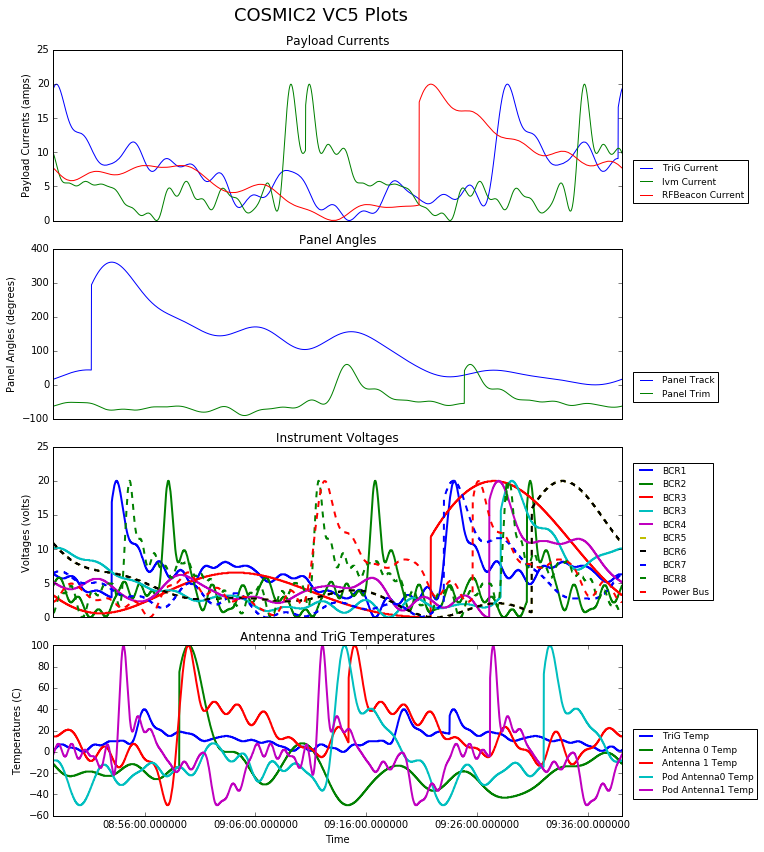

In [16]:
# VC5 Plot 
fig = plt.figure(figsize=(9,12))

# A subplot for currents: 
ax = fig.add_subplot(411)
plt.plot(x, triGCurrent, label='TriG Current')
plt.plot(x, ivmCurrent, label='Ivm Current') 
plt.plot(x, rfmBeaconCurrent, label='RFBeacon Current')
plt.legend(loc=(01.02, 0.10), fontsize=9)
ax.set_title('Payload Currents')
ax.set_ylabel("Payload Currents (amps)")
ax.axes.get_xaxis().set_visible(False)

# A subplot for panels:
ax1 = fig.add_subplot(412)
plt.plot(x, panelTrack, label='Panel Track')
plt.plot(x, panelTrim, label='Panel Trim')
plt.legend(loc=(01.02, 0.10), fontsize=9)
ax1.set_title('Panel Angles')
ax1.set_ylabel("Panel Angles (degrees)")
ax1.axes.get_xaxis().set_visible(False)

# A subplot for voltages:
ax2 = fig.add_subplot(413)
plt.plot(x, BCR1Vol, label='BCR1', linewidth=2.0)
plt.plot(x, BCR2Vol, label='BCR2', linewidth=2.0)
plt.plot(x, BCR3Vol, label='BCR3', linewidth=2.0)
plt.plot(x, BCR4Vol, label='BCR3', linewidth=2.0)
plt.plot(x, BCR5Vol, label='BCR4', linewidth=2.0)
plt.plot(x, BCR6Vol, '--', label='BCR5', linewidth=2.0)
plt.plot(x, BCR6Vol, '--', label='BCR6', linewidth=2.0)
plt.plot(x, BCR7Vol, '--', label='BCR7', linewidth=2.0)
plt.plot(x, BCR8Vol, '--', label='BCR8', linewidth=2.0)
plt.plot(x, powerBusVolt, '--', label='Power Bus', linewidth=2.0)
plt.legend(loc=(01.02, 0.10), fontsize=9)
ax2.set_title('Instrument Voltages')
ax2.set_ylabel("Voltages (volts)")
ax2.axes.get_xaxis().set_visible(False)

# A subplot for temperatures:
ax3 = fig.add_subplot(414)
plt.plot(x, trigTemp, label='TriG Temp', linewidth=2.0)
plt.plot(x, occAntenna0Temp, label='Antenna 0 Temp', linewidth=2.0)
plt.plot(x, occAntenna1Temp, label='Antenna 1 Temp', linewidth=2.0)
plt.plot(x, podAntenna0Temp0, label='Pod Antenna0 Temp', linewidth=2.0)
plt.plot(x, podAntenna1Temp0, label='Pod Antenna1 Temp', linewidth=2.0)
plt.legend(loc=(01.02, 0.10), fontsize=9)
ax3.set_title('Antenna and TriG Temperatures')
ax3.set_ylabel("Temperatures (C)")
ax3.set_xlabel("Time")

# Overall Plot Title
plt.suptitle(('COSMIC2 VC5 Plots'), fontsize=18)
fig.tight_layout()

# Title Buffer
fig.subplots_adjust(top=0.93)
# out_file = (incorporate with DPlib.pm)
# plt.savefig(out_file)

plt.show()